<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_09/linear_algebra_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 📘 1장: 벡터 (Vectors)
### 🔹 개념 요약
- 벡터는 방향과 크기를 가진 수학적 객체입니다.
- 덧셈, 스칼라 곱, 내적, 크기 등을 이해하는 것이 중요합니다.

### 🔹 직관적 영상
[Essence of Linear Algebra – Chapter 1 (3Blue1Brown)](https://www.youtube.com/watch?v=fNk_zzaMoSs)
        

In [1]:

import numpy as np

# 벡터 생성
v1 = np.array([3, 4])
v2 = np.array([1, -1])

# 벡터 연산
sum_v = v1 + v2
dot_product = np.dot(v1, v2)
norm = np.linalg.norm(v1)

print("벡터 합:", sum_v)
print("내적:", dot_product)
print("크기:", norm)

벡터 합: [4 3]
내적: -1
크기: 5.0


Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


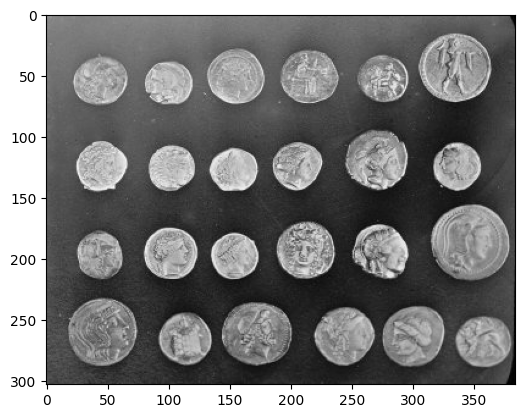

In [2]:
from skimage import data
import matplotlib.pyplot as plt

coins = data.coins()  # 흑백 이미지 (NumPy 배열)
print('Type:', type(coins))  # <class 'numpy.ndarray'>
print('dtype:', coins.dtype) # uint8
print('shape:', coins.shape) # (303, 384)

plt.imshow(coins, cmap='gray')
plt.show()

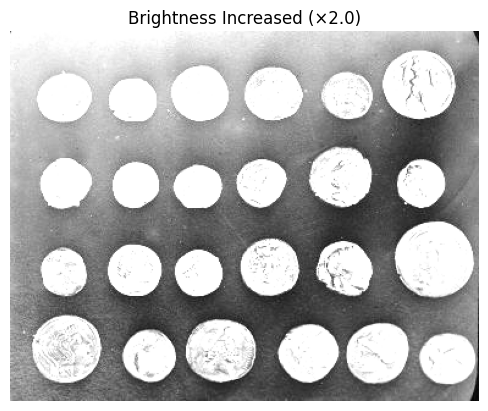

In [3]:
coins = data.coins()

# 밝기 증가 (1.5배)
brighter = coins * 2.0
brighter = np.clip(brighter, 0, 255).astype(np.uint8)  # 데이터 범위 제한 후 uint8 변환

plt.imshow(brighter, cmap='gray')
plt.title("Brightness Increased (×2.0)")
plt.axis('off')
plt.show()



## 📘 2장: 선형결합, Span, 기저(Base)

### 🔹 개념 요약
- 선형결합: 여러 벡터를 스칼라 곱해 더한 것
- Span: 선형결합으로 생성되는 공간
- 기저: 선형독립 + Span을 모두 만족하는 최소 집합

### 🔹 직관적 영상
[Linear combinations, span, linear dependence (3Blue1Brown)](https://www.youtube.com/watch?v=k7RM-ot2NWY)
        

In [4]:
v1 = np.array([1, 2])
v2 = np.array([2, 4])  # v2는 v1의 배수
span = np.column_stack((v1, v2))
span

array([[1, 2],
       [2, 4]])

In [5]:
rank = np.linalg.matrix_rank(span)

print("벡터 집합의 차원(랭크):", rank)

벡터 집합의 차원(랭크): 1


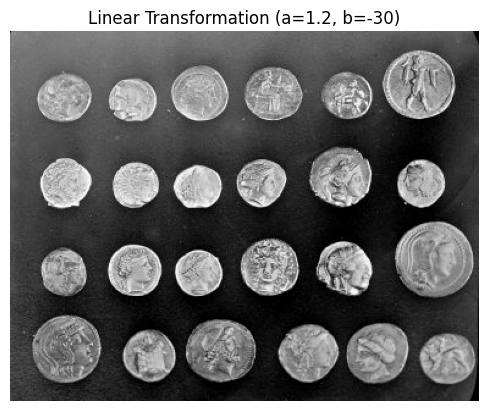

In [6]:
# 선형 변환: output = a * x + b
a = 1.2  # 대비 증가 계수
b = -30  # 전체적으로 어둡게 이동

linear_transformed = coins * a + b
linear_transformed = np.clip(linear_transformed, 0, 255).astype(np.uint8)

plt.imshow(linear_transformed, cmap='gray')
plt.title("Linear Transformation (a=1.2, b=-30)")
plt.axis('off')
plt.show()


## 📘 3장: 선형변환과 행렬(Linear Transformation & Matrix)

### 🔹 개념 요약
- 선형변환은 행렬로 표현 가능하며, 공간을 변형시킵니다.
- \(T(x) = Ax\) 형태로 계산합니다.

### 🔹 직관적 영상
[What is a matrix? – Linear Transformation Intro (3Blue1Brown)](https://www.youtube.com/watch?v=kYB8IZa5AuE)
        

In [7]:

A = np.array([[2, 0], [0, 1]])
v = np.array([1, 2])
print(A.shape)
print(v.shape)

T_v = A @ v  # 선형변환 적용
print("변환된 벡터:", T_v)


(2, 2)
(2,)
변환된 벡터: [2 2]



## 📘 4장: 행렬곱과 합성변환

### 🔹 개념 요약
- 행렬곱은 연속된 선형변환을 하나로 합성하는 역할
- 순서가 중요하며 \(AB \neq BA\)

### 🔹 직관적 영상
[Matrix multiplication as transformation composition (3Blue1Brown)](https://www.youtube.com/watch?v=XkY2DOUCWMU)
        

In [8]:

A = np.arange(15).reshape(3,5)
print(A)
print(A.shape)
B = np.arange(15).reshape(5,3)
print(B)
print(B.shape)

C = A @ B  # 합성된 행렬
print("합성 행렬 A·B:\n", C)
print(C.shape)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
(3, 5)
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
(5, 3)
합성 행렬 A·B:
 [[ 90 100 110]
 [240 275 310]
 [390 450 510]]
(3, 3)


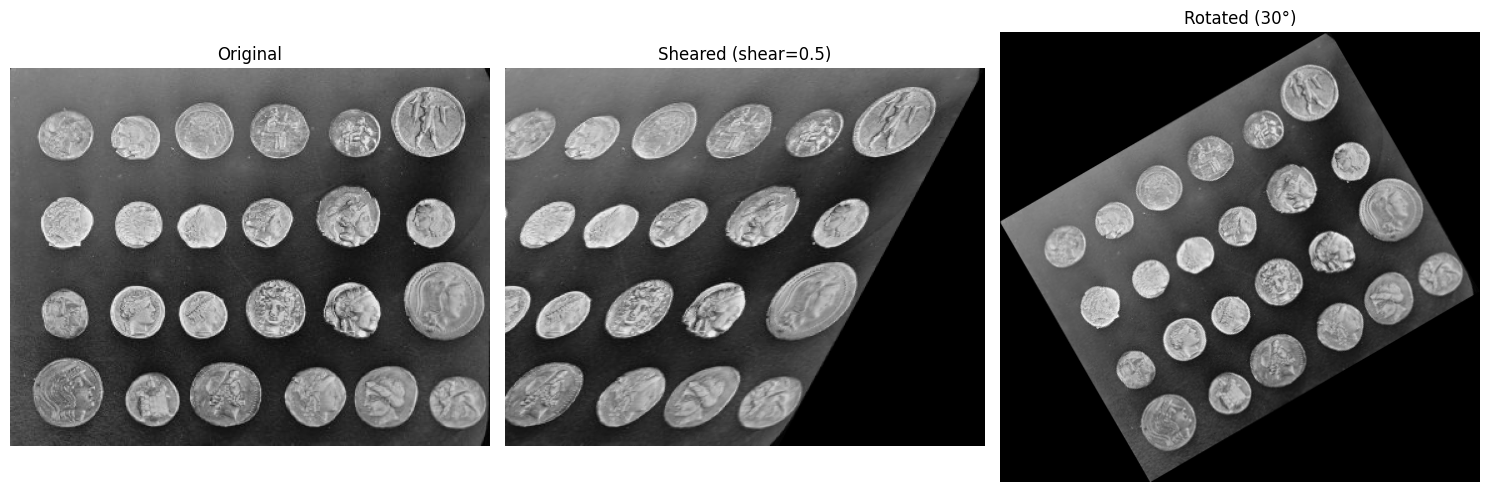

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import AffineTransform, warp, rotate

# 이미지 불러오기
coins = data.coins()

# 1. Shear 변환 (X축 기준으로 기울이기)
shear_transform = AffineTransform(shear=0.5)  # 라디안 단위
sheared_image = warp(coins, shear_transform.inverse)

# 2. Rotate 변환 (반시계 방향 회전)
rotated_image = rotate(coins, angle=30, resize=True)

# 결과 출력
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(coins, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(sheared_image, cmap='gray')
axes[1].set_title("Sheared (shear=0.5)")
axes[1].axis('off')

axes[2].imshow(rotated_image, cmap='gray')
axes[2].set_title("Rotated (30°)")
axes[2].axis('off')

plt.tight_layout()
plt.show()


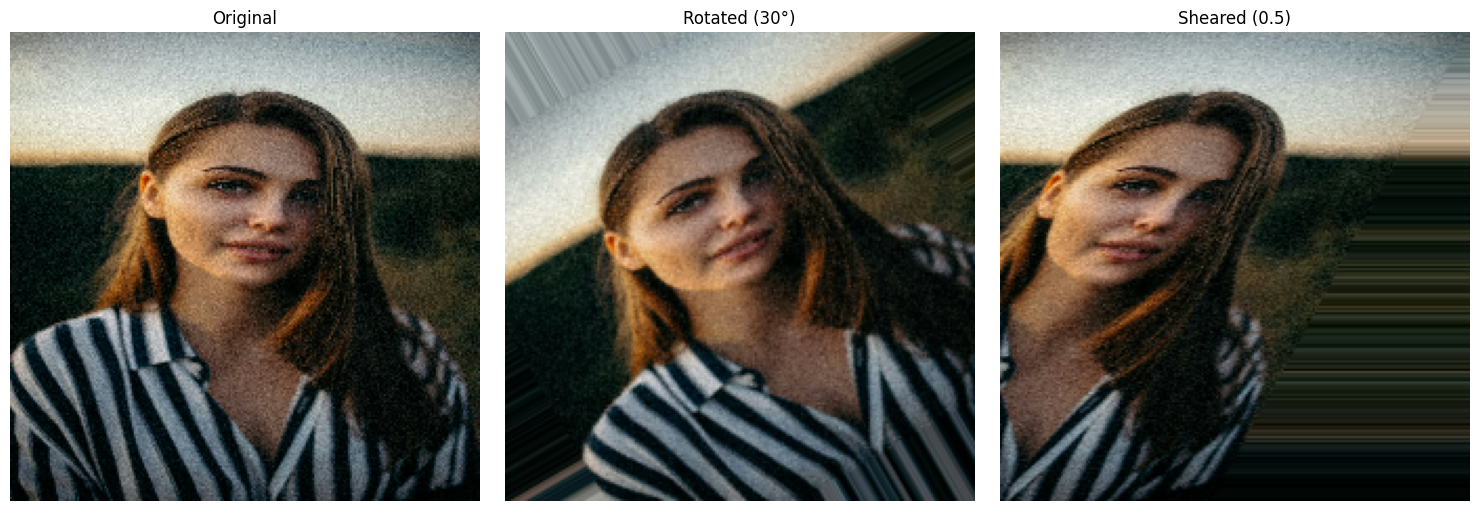

In [28]:
import tensorflow as tf
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from skimage import transform as skimage_transform

# Download example image
image_url = "https://images.unsplash.com/photo-1544005313-94ddf0286df2"
image_path = get_file("woman2.jpg", origin=image_url)

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = np.array(img)

# Rotate function using skimage for better quality
def rotate_image(image, angle):
    # Convert to float for better precision during transformation
    image_float = image.astype(np.float32) / 255.0
    # Apply rotation using skimage which handles boundaries better
    rotated = skimage_transform.rotate(image_float, angle, resize=False, mode='edge', preserve_range=True)
    # Convert back to uint8
    return (rotated * 255).astype(np.uint8)

# Shear function using skimage for better quality
def shear_image(image, shear_factor):
    # Convert to float for better precision
    image_float = image.astype(np.float32) / 255.0
    # Create affine transform matrix for shearing
    afine_tf = skimage_transform.AffineTransform(shear=shear_factor)
    # Apply transformation
    sheared = skimage_transform.warp(image_float, inverse_map=afine_tf.inverse, mode='edge', preserve_range=True)
    # Convert back to uint8
    return (sheared * 255).astype(np.uint8)

# Apply transformations
rotated_img = rotate_image(img_array, 30)
sheared_img = shear_image(img_array, 0.5)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img_array)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Rotated (30°)")
plt.imshow(rotated_img)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sheared (0.5)")
plt.imshow(sheared_img)
plt.axis("off")

plt.tight_layout()
plt.show()


## 📘 9장: 내적과 쌍대성

### 🔹 개념 요약
- 내적은 두 벡터의 유사도, 각도 측정 가능
- 내적이 0이면 직교
- 쌍대성: 벡터 공간과 그에 대응하는 함수 공간의 관계

### 🔹 직관적 영상
[Dot Product Intuition – (3Blue1Brown)](https://www.youtube.com/watch?v=LyGKycYT2v0)
        

In [11]:

a = np.array([1, 2])
b = np.array([3, 4])

cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
print("두 벡터 사이의 코사인 값:", cos_theta)


두 벡터 사이의 코사인 값: 0.9838699100999074


In [12]:
a = np.array([1, 2])
b = np.array([100, 200])

cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
print("두 벡터 사이의 코사인 값:", cos_theta)

두 벡터 사이의 코사인 값: 1.0


# 📐 Dot Product and Cosine of Angle Between Vectors

## ✅ 1. What is the Dot Product?

# 두 벡터의 내적 정의

두 벡터 $\mathbf{A}$, $\mathbf{B}$의 내적은 다음과 같이 정의됩니다:

$$\mathbf{A} \cdot \mathbf{B} = |\mathbf{A}||\mathbf{B}|\cos\theta$$

여기서
* $|\mathbf{A}|$, $|\mathbf{B}|$: 각 벡터의 크기
* $\theta$: 두 벡터 사이의 각도
* 결과는 스칼라(숫자)입니다


---


## ✅ 2. 내적의 의미 (코사인 각도와의 관계)

| 각도 \(\theta\) | \(\cos \theta\) | 내적 A·B | 의미 |
|----------------|------------------|----------|------|
| 0°             | 1                | 최대 양수 | 같은 방향 |
| 90°            | 0                | 0        | 수직 (직각) |
| 180°           | -1               | 음수 최대| 반대 방향 |

즉, **내적은 방향 유사성을 수치화한 값**입니다.

---

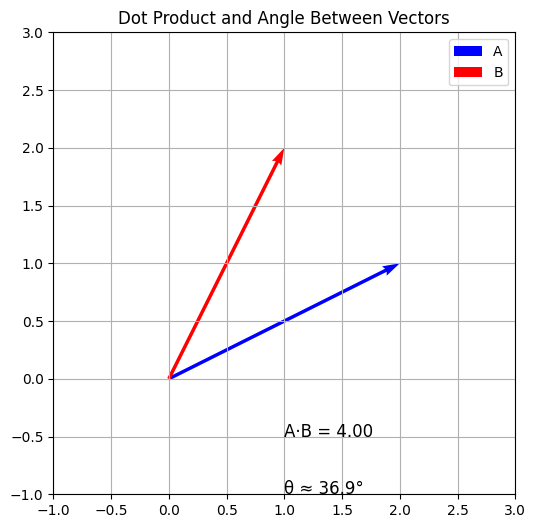

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 벡터 정의
A = np.array([2, 1])
B = np.array([1, 2])

# 내적 계산
dot_product = np.dot(A, B)
cos_theta = dot_product / (np.linalg.norm(A) * np.linalg.norm(B))
theta = np.arccos(cos_theta) * 180 / np.pi  # 각도 (도)

# 시각화
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='blue', label='A')
plt.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='red', label='B')

plt.text(1, -0.5, f"A·B = {dot_product:.2f}", fontsize=12)
plt.text(1, -1.0, f"θ ≈ {theta:.1f}°", fontsize=12)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid()
plt.gca().set_aspect('equal')
plt.legend()
plt.title("Dot Product and Angle Between Vectors")
plt.show()


# 벡터 투영 공식과 코사인 유사도

## 1. 벡터 투영 공식

벡터 $\mathbf{A}$를 벡터 $\mathbf{B}$ 위에 투영한 벡터 $\mathbf{A_{proj}}$는 다음과 같이 정의됩니다:

$$\mathbf{A_{proj}} = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{B}|^2} \mathbf{B}$$

투영된 벡터의 크기(스칼라 투영)는 다음과 같습니다:

$$|\mathbf{A_{proj}}| = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{B}|} = |\mathbf{A}|\cos\theta$$

여기서:
* $\mathbf{A} \cdot \mathbf{B}$: 두 벡터의 내적
* $|\mathbf{B}|$: 벡터 $\mathbf{B}$의 크기
* $\theta$: 두 벡터 사이의 각도

## 2. 코사인 유사도

코사인 유사도는 두 벡터 간의 유사성을 측정하는 지표로, 두 벡터 사이의 코사인 각도를 이용합니다:

$$\text{코사인 유사도} = \cos\theta = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{A}||\mathbf{B}|}$$

코사인 유사도의 범위는 [-1, 1]이며:
* 1: 두 벡터의 방향이 완전히 같음 (0°)
* 0: 두 벡터가 수직 (90°)
* -1: 두 벡터의 방향이 완전히 반대 (180°)

## 3. 파이썬 시각화 코드


In [14]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Arrow class for 2D vectors
class Arrow2D(FancyArrowPatch):
    def __init__(self, x, y, dx, dy, *args, **kwargs):
        super().__init__((x, y), (x+dx, y+dy), *args, **kwargs)

# Arrow class for 3D vectors
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

def plot_vector_projection_2d():
    """
    Visualize 2D vector projection and print information separately
    """
    # Define vectors
    A = np.array([3, 4])
    B = np.array([5, 0])

    # Project vector A onto B
    A_proj_scalar = np.dot(A, B) / np.linalg.norm(B)
    A_proj = (np.dot(A, B) / np.dot(B, B)) * B

    # Calculate cosine similarity
    cos_sim = np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))
    angle = np.arccos(cos_sim)

    # First print the text information
    print("--- Vector Projection Information ---")
    print(f"Vector A = {A}")
    print(f"Vector B = {B}")
    print(f"Projection of A onto B = {A_proj}")
    print(f"Length of projected vector = {A_proj_scalar:.2f}")
    print(f"Cosine similarity = {cos_sim:.2f}")
    print(f"Angle = {np.degrees(angle):.2f}°")
    print("------------------------------------")

    # Then create the visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-1, 5)
    ax.set_aspect('equal')
    ax.grid(alpha=0.3)

    # Draw vectors
    a_arrow = Arrow2D(0, 0, A[0], A[1], color='blue', lw=2, arrowstyle='->', label='A')
    b_arrow = Arrow2D(0, 0, B[0], B[1], color='red', lw=2, arrowstyle='->', label='B')
    proj_arrow = Arrow2D(0, 0, A_proj[0], A_proj[1], color='green', lw=2, arrowstyle='->', label='A_proj')

    # Draw projection line (dashed line from A to A_proj)
    ax.plot([A[0], A_proj[0]], [A[1], A_proj[1]], 'k--', alpha=0.5)

    # Display angle (arc)
    angle_radius = 0.5
    ax.plot([0, angle_radius*np.cos(0)], [0, angle_radius*np.sin(0)], 'k-', alpha=0.3)
    theta = np.linspace(0, angle, 20)
    ax.plot(angle_radius*np.cos(theta), angle_radius*np.sin(theta), 'k-', alpha=0.5)

    # Add arrows
    ax.add_patch(a_arrow)
    ax.add_patch(b_arrow)
    ax.add_patch(proj_arrow)

    # Add text labels
    ax.text(A[0]/2, A[1]/2, r'$\mathbf{A}$', fontsize=12, ha='center', va='center')
    ax.text(B[0]/2, B[1]/2, r'$\mathbf{B}$', fontsize=12, ha='center', va='center')
    ax.text(A_proj[0]/2, A_proj[1]/2, r'$\mathbf{A_{proj}}$', fontsize=12, ha='center', va='center')
    ax.text(angle_radius/2, angle_radius/3, r'$\theta$', fontsize=12)

    # Title and legend
    ax.set_title('Vector Projection Visualization', fontsize=14)
    ax.legend(handles=[a_arrow, b_arrow, proj_arrow], loc='upper right')

    plt.tight_layout()
    plt.show()

def plot_cosine_similarity_heatmap():
    """
    Visualize cosine similarity between vectors and print information separately
    """
    # Visualize cosine similarity between various vectors
    vectors = {
        'v1': np.array([1, 0]),
        'v2': np.array([0, 1]),
        'v3': np.array([1, 1]),
        'v4': np.array([-1, 0]),
        'v5': np.array([0.7, 0.7])
    }

    n = len(vectors)
    cos_sim_matrix = np.zeros((n, n))

    # Calculate cosine similarity matrix
    for i, (name_i, vec_i) in enumerate(vectors.items()):
        for j, (name_j, vec_j) in enumerate(vectors.items()):
            cos_sim_matrix[i, j] = np.dot(vec_i, vec_j) / (np.linalg.norm(vec_i) * np.linalg.norm(vec_j))

    # First print the information
    print("--- Cosine Similarity Matrix ---")
    print("Vectors:")
    for name, vec in vectors.items():
        print(f"{name}: {vec}")
    print("\nCosine Similarity Matrix:")
    for i, name_i in enumerate(vectors.keys()):
        row = " ".join([f"{cos_sim_matrix[i, j]:6.2f}" for j in range(n)])
        print(f"{name_i}: {row}")
    print("-------------------------------")

    # Then create the visualization
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cos_sim_matrix, cmap='coolwarm', vmin=-1, vmax=1)

    # Add axis labels
    names = list(vectors.keys())
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)

    # Display values in each cell
    for i in range(n):
        for j in range(n):
            text = ax.text(j, i, f"{cos_sim_matrix[i, j]:.2f}",
                          ha="center", va="center", color="black" if abs(cos_sim_matrix[i, j]) < 0.7 else "white")

    plt.colorbar(im, label='Cosine Similarity')
    ax.set_title('Cosine Similarity Heatmap Between Vectors', fontsize=14)
    plt.tight_layout()
    plt.show()

def print_document_cosine_similarity(documents):
    """
    Print document similarity information without visualization
    """
    # Create document-term matrix
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)

    # Calculate cosine similarity
    cos_sim_matrix = np.zeros((len(documents), len(documents)))
    for i in range(len(documents)):
        for j in range(len(documents)):
            v1 = X[i].toarray().flatten()
            v2 = X[j].toarray().flatten()
            cos_sim_matrix[i, j] = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

    # Print document information and cosine similarity matrix
    print("--- Document Cosine Similarity ---")
    print("Documents:")
    for i, doc in enumerate(documents):
        print(f"Document {i+1}: {doc}")

    print("\nCosine Similarity Matrix:")
    for i in range(len(documents)):
        row = " ".join([f"{cos_sim_matrix[i, j]:6.2f}" for j in range(len(documents))])
        print(f"Doc {i+1}: {row}")
    print("---------------------------------")

    return cos_sim_matrix, vectorizer

def plot_document_cosine_similarity(documents, cos_sim_matrix=None):
    """
    Visualize cosine similarity between text documents
    """
    if cos_sim_matrix is None:
        # Create document-term matrix and calculate similarity if not provided
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(documents)

        # Calculate cosine similarity
        cos_sim_matrix = np.zeros((len(documents), len(documents)))
        for i in range(len(documents)):
            for j in range(len(documents)):
                v1 = X[i].toarray().flatten()
                v2 = X[j].toarray().flatten()
                cos_sim_matrix[i, j] = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

    # Create the visualization
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(cos_sim_matrix, cmap='viridis', vmin=0, vmax=1)

    # Add axis labels
    doc_labels = [f"Document {i+1}" for i in range(len(documents))]
    ax.set_xticks(np.arange(len(documents)))
    ax.set_yticks(np.arange(len(documents)))
    ax.set_xticklabels(doc_labels)
    ax.set_yticklabels(doc_labels)

    # Display values in each cell
    for i in range(len(documents)):
        for j in range(len(documents)):
            text = ax.text(j, i, f"{cos_sim_matrix[i, j]:.2f}",
                          ha="center", va="center", color="black" if cos_sim_matrix[i, j] < 0.7 else "white")

    # Add colorbar
    plt.colorbar(im, label='Cosine Similarity')

    # Add document content to the figure
    for i, doc in enumerate(documents):
        plt.figtext(0.02, 0.9 - i*0.05, f"Document {i+1}: {doc}", fontsize=9)

    ax.set_title('Cosine Similarity Between Documents', fontsize=14)
    plt.tight_layout()
    plt.show()

def demo_cosine_similarity_text():
    """
    Example of text document similarity with separate text and visualization,
    without document text duplication in the graph
    """
    # Sample documents
    documents = [
        "Vectors have magnitude and direction",
        "Vector spaces are collections of vectors",
        "A matrix is a rectangular array of numbers",
        "Linear algebra studies vectors and matrices",
        "Machine learning finds patterns in data"
    ]

    # First print the text information, getting the cosine similarity matrix
    cos_sim_matrix, vectorizer = print_document_cosine_similarity(documents)

    # Then plot the visualization using the pre-calculated matrix, but without text duplication
    # Create the visualization
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(cos_sim_matrix, cmap='viridis', vmin=0, vmax=1)

    # Add axis labels
    doc_labels = [f"Document {i+1}" for i in range(len(documents))]
    ax.set_xticks(np.arange(len(documents)))
    ax.set_yticks(np.arange(len(documents)))
    ax.set_xticklabels(doc_labels)
    ax.set_yticklabels(doc_labels)

    # Display values in each cell
    for i in range(len(documents)):
        for j in range(len(documents)):
            text = ax.text(j, i, f"{cos_sim_matrix[i, j]:.2f}",
                          ha="center", va="center", color="black" if cos_sim_matrix[i, j] < 0.7 else "white")

    # Add colorbar
    plt.colorbar(im, label='Cosine Similarity')

    # Document content was already printed to console, don't add it to the figure
    # Removing the following lines to avoid duplication:
    # for i, doc in enumerate(documents):
    #     plt.figtext(0.02, 0.9 - i*0.05, f"Document {i+1}: {doc}", fontsize=9)

    ax.set_title('Cosine Similarity Between Documents', fontsize=14)
    plt.tight_layout()
    plt.show()


def plot_vector_projection_3d():
    """
    Visualize 3D vector projection and print information separately
    """
    # Define vectors
    A = np.array([2, 3, 4])
    B = np.array([4, 1, 0])

    # Project vector A onto B
    A_proj_scalar = np.dot(A, B) / np.linalg.norm(B)
    A_proj = (np.dot(A, B) / np.dot(B, B)) * B

    # Calculate cosine similarity
    cos_sim = np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))

    # First print the text information
    print("--- 3D Vector Projection Information ---")
    print(f"Vector A = {A}")
    print(f"Vector B = {B}")
    print(f"Projection of A onto B = {A_proj}")
    print(f"Length of projected vector = {A_proj_scalar:.2f}")
    print(f"Cosine similarity = {cos_sim:.2f}")
    print(f"Angle = {np.degrees(np.arccos(cos_sim)):.2f}°")
    print("---------------------------------------")

    # Then create the visualization
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Set up axes
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.set_zlim(0, 5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Draw vector arrows
    a_arrow = Arrow3D([0, A[0]], [0, A[1]], [0, A[2]],
                      mutation_scale=20, lw=2, arrowstyle='->', color='blue')
    b_arrow = Arrow3D([0, B[0]], [0, B[1]], [0, B[2]],
                      mutation_scale=20, lw=2, arrowstyle='->', color='red')
    proj_arrow = Arrow3D([0, A_proj[0]], [0, A_proj[1]], [0, A_proj[2]],
                         mutation_scale=20, lw=2, arrowstyle='->', color='green')

    # Draw projection line
    ax.plot([A[0], A_proj[0]], [A[1], A_proj[1]], [A[2], A_proj[2]], 'k--', alpha=0.5)

    # Add arrows
    ax.add_artist(a_arrow)
    ax.add_artist(b_arrow)
    ax.add_artist(proj_arrow)

    # Add text labels
    ax.text(A[0], A[1], A[2], r'$\mathbf{A}$', fontsize=12)
    ax.text(B[0], B[1], B[2], r'$\mathbf{B}$', fontsize=12)
    ax.text(A_proj[0], A_proj[1], A_proj[2], r'$\mathbf{A_{proj}}$', fontsize=12)

    ax.set_title('3D Vector Projection Visualization', fontsize=14)
    plt.tight_layout()
    plt.show()


--- Vector Projection Information ---
Vector A = [3 4]
Vector B = [5 0]
Projection of A onto B = [3. 0.]
Length of projected vector = 3.00
Cosine similarity = 0.60
Angle = 53.13°
------------------------------------


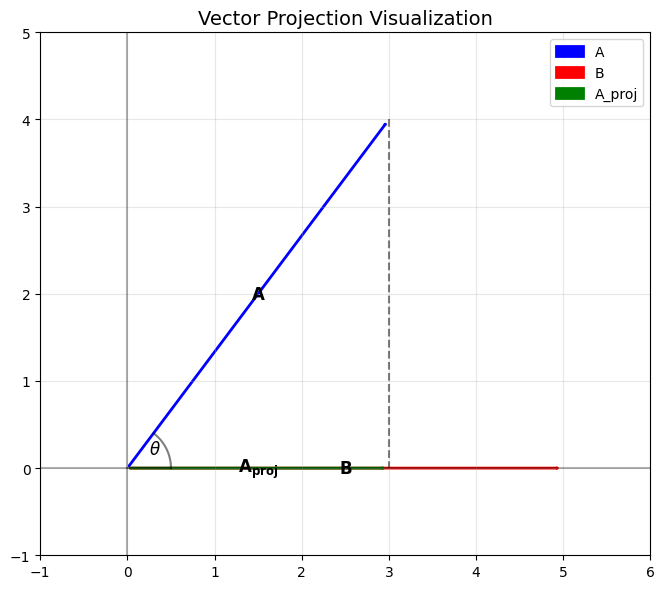

In [15]:
# 2D vector projection visualization
plot_vector_projection_2d()

--- 3D Vector Projection Information ---
Vector A = [2 3 4]
Vector B = [4 1 0]
Projection of A onto B = [2.58823529 0.64705882 0.        ]
Length of projected vector = 2.67
Cosine similarity = 0.50
Angle = 60.30°
---------------------------------------


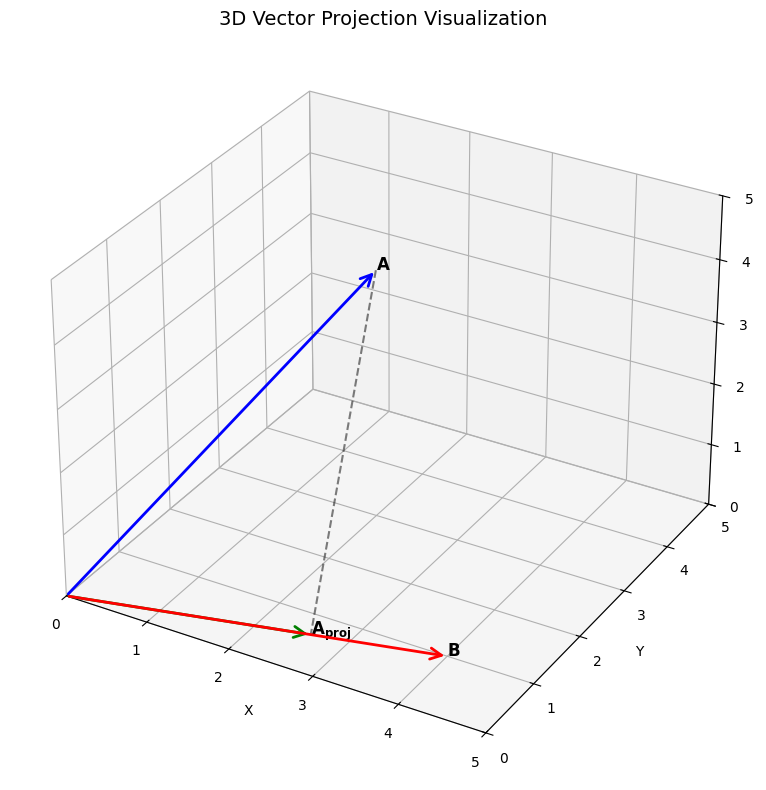

In [16]:

# 3D vector projection visualization
plot_vector_projection_3d()

In [17]:
vectors = {
        'v1': np.array([1, 0]),
        'v2': np.array([0, 1]),
        'v3': np.array([1, 1]),
        'v4': np.array([-1, 0]),
        'v5': np.array([0.7, 0.7])
    }

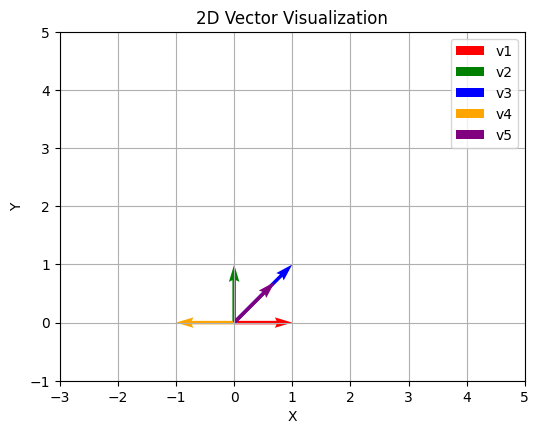

In [18]:
colors = ['red', 'green', 'blue', 'orange', 'purple']

def plot_vectors(vectors):
    plt.figure(figsize=(6, 6))
    for i, (name, v) in enumerate(vectors.items()):
        plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=colors[i], label=name)
    plt.xlim(-3, 5)  # Adjust x-axis limits as needed
    plt.ylim(-1, 5)  # Adjust y-axis limits as needed
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("2D Vector Visualization")
    plt.grid(True)
    plt.legend()
    plt.gca().set_aspect('equal')
    plt.show()

plot_vectors(vectors)

--- Cosine Similarity Matrix ---
Vectors:
v1: [1 0]
v2: [0 1]
v3: [1 1]
v4: [-1  0]
v5: [0.7 0.7]

Cosine Similarity Matrix:
v1:   1.00   0.00   0.71  -1.00   0.71
v2:   0.00   1.00   0.71   0.00   0.71
v3:   0.71   0.71   1.00  -0.71   1.00
v4:  -1.00   0.00  -0.71   1.00  -0.71
v5:   0.71   0.71   1.00  -0.71   1.00
-------------------------------


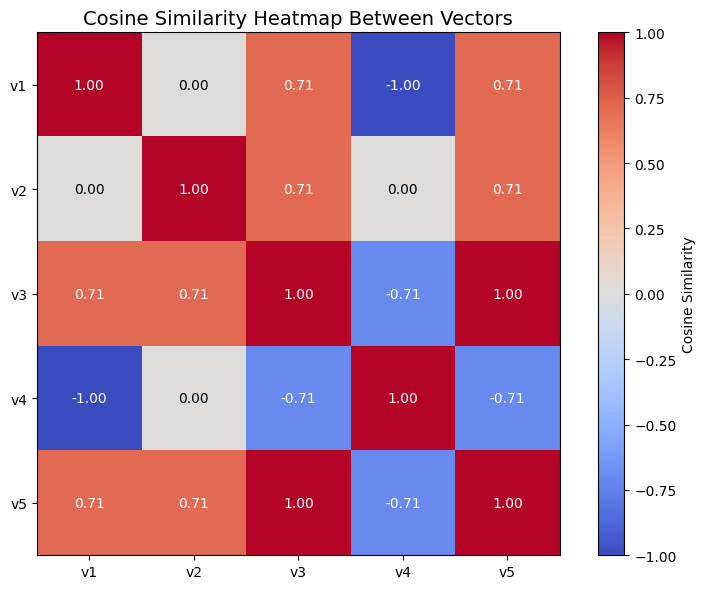

In [19]:

# Cosine similarity heatmap
plot_cosine_similarity_heatmap()


--- Document Cosine Similarity ---
Documents:
Document 1: Vectors have magnitude and direction
Document 2: Vector spaces are collections of vectors
Document 3: A matrix is a rectangular array of numbers
Document 4: Linear algebra studies vectors and matrices
Document 5: Machine learning finds patterns in data

Cosine Similarity Matrix:
Doc 1:   1.00   0.18   0.00   0.37   0.00
Doc 2:   0.18   1.00   0.17   0.17   0.00
Doc 3:   0.00   0.17   1.00   0.00   0.00
Doc 4:   0.37   0.17   0.00   1.00   0.00
Doc 5:   0.00   0.00   0.00   0.00   1.00
---------------------------------


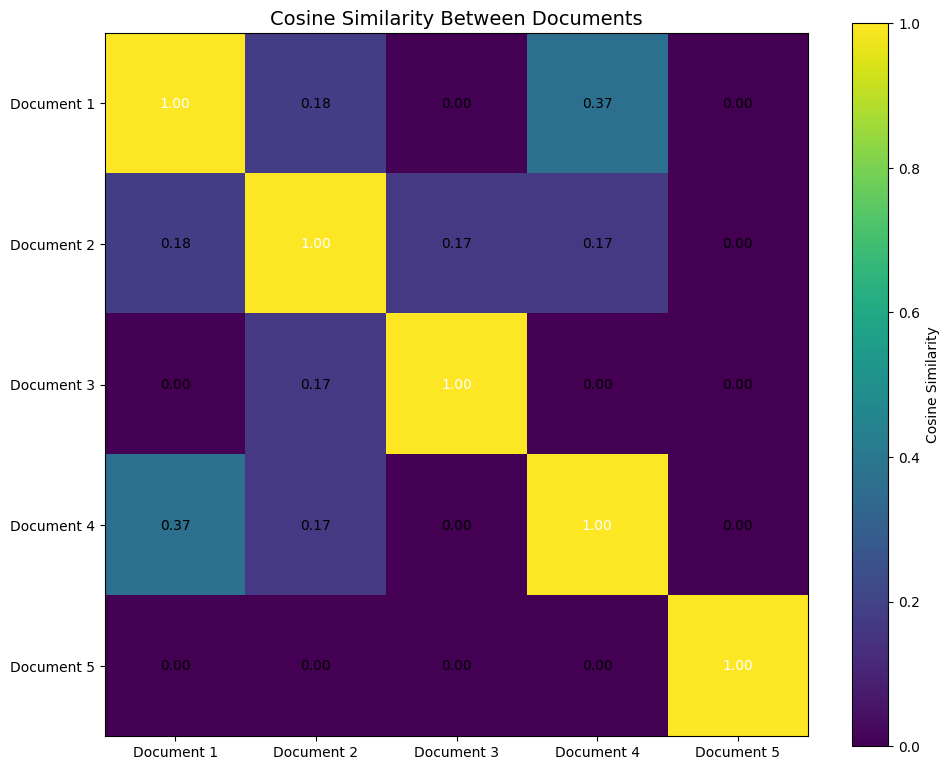

In [20]:

    # Text document cosine similarity
    demo_cosine_similarity_text()
